## Get Predictions Practice

In this notebook I play around with getting predictions for the image in my application and figure out the logic of how to get them to display in folders. 

In [14]:
# modelling
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parent_dir = '../../'

In [2]:
model5 = load_model(parent_dir + 'models/model5_old4', custom_objects = None, compile = True)

In [6]:
demo_images_dir = parent_dir + 'deployment/static/images'

In [7]:
# All images will be rescaled by 1./255
demo_datagen = ImageDataGenerator(rescale=1./255)

demo_generator = demo_datagen.flow_from_directory(demo_images_dir, target_size=(256, 256), 
                                                  batch_size=32)

Found 0 images belonging to 0 classes.


Ok so the ImageDataGenerator requires the images to be labelled... I'm going to have to either have labeled images in my application or figure out how to get the model to take unlabeled data...

For now, let's get something working with labeled data.

In [10]:
test_dir = parent_dir + 'data/seg_test/'

In [41]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (256, 256), batch_size = 32, shuffle=False)

Found 3000 images belonging to 6 classes.


In [44]:
preds_unshuff = model5.predict_generator(test_generator)

In [45]:
preds_unshuff

array([[9.7229004e-01, 1.1036863e-07, 9.9341712e-05, 5.9567103e-03,
        2.1643667e-02, 1.0167461e-05],
       [6.3523495e-01, 8.2145201e-04, 1.8941322e-02, 4.5837625e-03,
        1.4714696e-01, 1.9327162e-01],
       [9.3584150e-01, 1.2681145e-06, 2.1315466e-06, 9.3774825e-06,
        1.4470976e-04, 6.4001046e-02],
       ...,
       [9.3240968e-05, 4.0445984e-03, 1.5480920e-02, 1.2841146e-01,
        8.5189182e-01, 7.8054785e-05],
       [9.7961777e-01, 1.2454154e-05, 1.0160657e-03, 5.8872905e-05,
        1.3599554e-02, 5.6952033e-03],
       [5.7069375e-03, 2.1170746e-04, 8.0659287e-03, 7.1106864e-05,
        1.9385992e-02, 9.6655834e-01]], dtype=float32)

In [46]:
preds

array([[9.9802989e-01, 1.2253324e-05, 9.4723699e-05, 6.6030589e-06,
        5.3834997e-04, 1.3181703e-03],
       [9.3061352e-01, 5.6300603e-04, 2.3924166e-03, 1.2133038e-03,
        3.1540547e-02, 3.3677272e-02],
       [1.3235436e-06, 2.8329625e-06, 5.0625819e-01, 4.4633788e-03,
        4.8926175e-01, 1.2552510e-05],
       ...,
       [1.6312841e-04, 1.0249150e-04, 1.5487652e-01, 7.7227765e-01,
        7.2571054e-02, 9.2404434e-06],
       [5.9794751e-03, 2.4603304e-04, 7.3651150e-02, 1.2754420e-02,
        8.9010626e-01, 1.7262703e-02],
       [4.6774995e-02, 1.1082768e-03, 1.2699127e-05, 4.5989880e-05,
        3.2523752e-04, 9.5173293e-01]], dtype=float32)

In [42]:
preds = model5.predict_generator(test_generator)

KeyboardInterrupt: 

In [35]:
model5.evaluate_generator(test_generator, steps=50)

[0.6090894341468811, 0.7993749976158142]

In [18]:
preds_max = np.argmax(preds, axis = 1)

In [53]:
preds_unshuff_max = np.argmax(preds_unshuff, axis = 1)

In [54]:
preds_max

array([0, 0, 2, ..., 3, 4, 5])

In [55]:
preds_unshuff_max

array([0, 0, 0, ..., 4, 0, 5])

In [52]:
set(preds_max == preds_unshuff_max)

{True}

In [56]:
confusion_matrix(test_generator.labels, preds_unshuff_max)

array([[356,   5,   2,   2,  41,  31],
       [  2, 433,   2,   7,   4,  26],
       [  5,   4, 389,  84,  67,   4],
       [  3,   4,  64, 389,  65,   0],
       [  5,   3,  21,  17, 463,   1],
       [ 64,  11,   2,   1,  31, 392]])

In [43]:
preds[0]

array([9.9802989e-01, 1.2253324e-05, 9.4723699e-05, 6.6030589e-06,
       5.3834997e-04, 1.3181703e-03], dtype=float32)

In [30]:
preds_max[:10]

array([0, 0, 2, 5, 1, 4, 0, 4, 4, 4])

In [38]:
test_generator.classes[-10:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [20]:
confusion_matrix(test_generator.labels, preds_max)

array([[ 58,  58,  76,  84,  95,  66],
       [ 73,  75,  66,  89,  96,  75],
       [ 74,  88,  80,  86, 137,  88],
       [ 75,  85,  85,  74, 117,  89],
       [ 75,  78,  94,  80, 111,  72],
       [ 80,  76,  79,  87, 115,  64]])

Accuracy:  0.8073333333333333


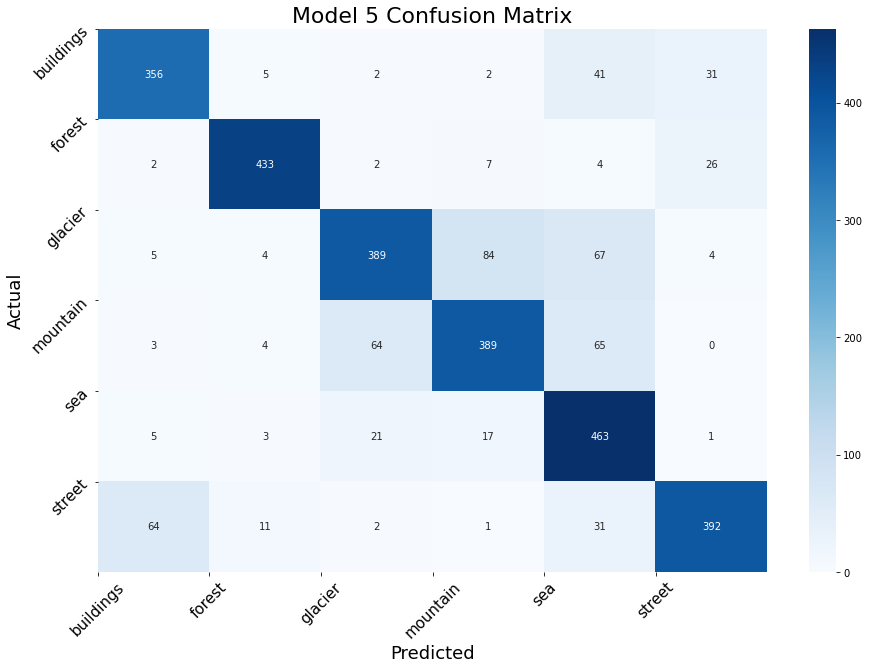

In [60]:
cm = confusion_matrix(test_generator.labels, preds_unshuff_max)
accuracy = accuracy_score(test_generator.labels, preds_unshuff_max)
print('Accuracy: ', accuracy)
plt.subplots(figsize = (15, 10))
sns.heatmap(cm,  cmap = 'Blues', annot = True, fmt = 'd')
plt.xticks(ticks = list(test_generator.class_indices.values()), labels = list(test_generator.class_indices.keys()), 
           rotation = 45, fontsize = 15)
plt.yticks(ticks = list(test_generator.class_indices.values()), labels = list(test_generator.class_indices.keys()),
           rotation = 45, fontsize = 15)
plt.xlabel('Predicted', fontsize = 18)
plt.ylabel('Actual', fontsize = 18)
plt.title('Model 5 Confusion Matrix', fontsize = 22)
plt.savefig(parent_dir + 'figures/model5_confusion_matrix')
plt.show()

Why is accuracy so low here when in the [notebook where I first modeled this](../../notebooks/modelling/06_modeling.ipynb) I had an accuracy of 81%???

In [23]:
test_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [28]:
classes = test_generator.class_indices

In [24]:
albums = {'buildings': [], 'forest': [], 'glacier': [], 
          'mountain': [], 'sea': [], 'street': []}

In [27]:
preds_max

array([0, 0, 2, ..., 3, 4, 5])

In [ ]:
for prediction in preds_max:
    if prediction is in list(classes.values()):
#       then grab the key of the matching value and do something like
        key = key where prediction == value
        albums[key].append(prediction)
        
# The only problem is, that we don't just want the predictions in the albums dictionary, we 
# want the actual item as the image file so that we can display the images within the app...
        